In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/news_share_model_ready.csv')
test_df = pd.read_csv('/content/news_test_data.csv')
print(df.shape)
print(test_df.shape)
df.head()




(999, 57)
(999, 57)


,cleaned_title,cleaned_text,weekday,is_weekend,month,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,Business,0,0,0,0,0,0.640816,5,3,1.0,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,3,2441.637795,2316.046429,2312.036810,3,102,2,0,0,49,28,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.97,-40.52
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,Tech,0,0,0,0,1,0.549618,4,1,0.0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,4,2233.879630,2316.046429,2676.025510,8,54,5,0,2,20,16,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.28,8.21
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,Tech,0,0,0,0,1,0.577236,8,1,0.0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,4,2233.879630,2316.046429,2676.025510,8,239,3,1,3,103,56,53,0,0,0,0,0,0,0,5,5,0,17,0,0,0,80.28,-179.58
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,Tech,0,0,0,0,1,0.525896,4,1,0.0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,4,4,2233.879630,2316.046429,2676.025510,5,141,2,1,2,67,42,26,0,0,0,0,0,0,0,0,0,0,2,0,1,0,32.56,-80.11
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,Others,0,0,1,0,0,0.588889,6,9,0.0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,4,4,2233.879630,2316.046429,2208.388571,8,148,5,2,1,62,49,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,71.82,-95.67


In [2]:
test_df.head()

,cleaned_title,cleaned_text,weekday,is_weekend,month,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,Business,0,0,0,0,0,0.640816,5,3,1.0,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,3,2441.637795,2316.046429,2312.036810,3,102,2,0,0,49,28,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.97,-40.52
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,Tech,0,0,0,0,1,0.549618,4,1,0.0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,4,2233.879630,2316.046429,2676.025510,8,54,5,0,2,20,16,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.28,8.21
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,Tech,0,0,0,0,1,0.577236,8,1,0.0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,4,2233.879630,2316.046429,2676.025510,8,239,3,1,3,103,56,53,0,0,0,0,0,0,0,5,5,0,17,0,0,0,80.28,-179.58
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,Tech,0,0,0,0,1,0.525896,4,1,0.0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,4,4,2233.879630,2316.046429,2676.025510,5,141,2,1,2,67,42,26,0,0,0,0,0,0,0,0,0,0,2,0,1,0,32.56,-80.11
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,Others,0,0,1,0,0,0.588889,6,9,0.0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,4,4,2233.879630,2316.046429,2208.388571,8,148,5,2,1,62,49,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,71.82,-95.67


In [3]:
df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'month no', 'weekday no',
       'avg shares daily', 'avg shares weekly', 'avg shares by channel',
       'title_tokens', 'text_tokens', 'noun_count_title', 'verb_count_title',
       'adjective_count_title', 'noun_count_text', 'verb_count_text',
       'adjective_count_text', 'amazon fire', 'april fools', 'fire tv',
       'game thrones', 'google glass', 'need know', 'report says',
       '2014opens n

In [4]:
test_df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'month no', 'weekday no',
       'avg shares daily', 'avg shares weekly', 'avg shares by channel',
       'title_tokens', 'text_tokens', 'noun_count_title', 'verb_count_title',
       'adjective_count_title', 'noun_count_text', 'verb_count_text',
       'adjective_count_text', 'amazon fire', 'april fools', 'fire tv',
       'game thrones', 'google glass', 'need know', 'report says',
       '2014opens n

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cleaned_title               999 non-null    object 
 1   cleaned_text                999 non-null    object 
 2   weekday                     999 non-null    object 
 3   is_weekend                  999 non-null    int64  
 4   month                       999 non-null    object 
 5   cleaned_data_channel        999 non-null    object 
 6   Channel_Entertainment       999 non-null    int64  
 7   Channel_Lifestyle           999 non-null    int64  
 8   Channel_Others              999 non-null    int64  
 9   Channel_Social Media        999 non-null    int64  
 10  Channel_Tech                999 non-null    int64  
 11  unique_tokens_rate          999 non-null    float64
 12  num_hrefs                   999 non-null    int64  
 13  num_imgs                    999 non

In [6]:
num_df = df.drop(columns = ['cleaned_title', 'cleaned_text', 'weekday','month',
       'cleaned_data_channel',])
test_df = test_df.drop(columns = ['cleaned_title', 'cleaned_text', 'weekday','month',
       'cleaned_data_channel',])
num_df.shape
test_df.shape

(999, 52)

In [7]:
cols_to_treat = num_df.drop(columns = ['month no', 'weekday no','is_weekend', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech'])

In [8]:
cols_to_treat.shape

(999, 44)

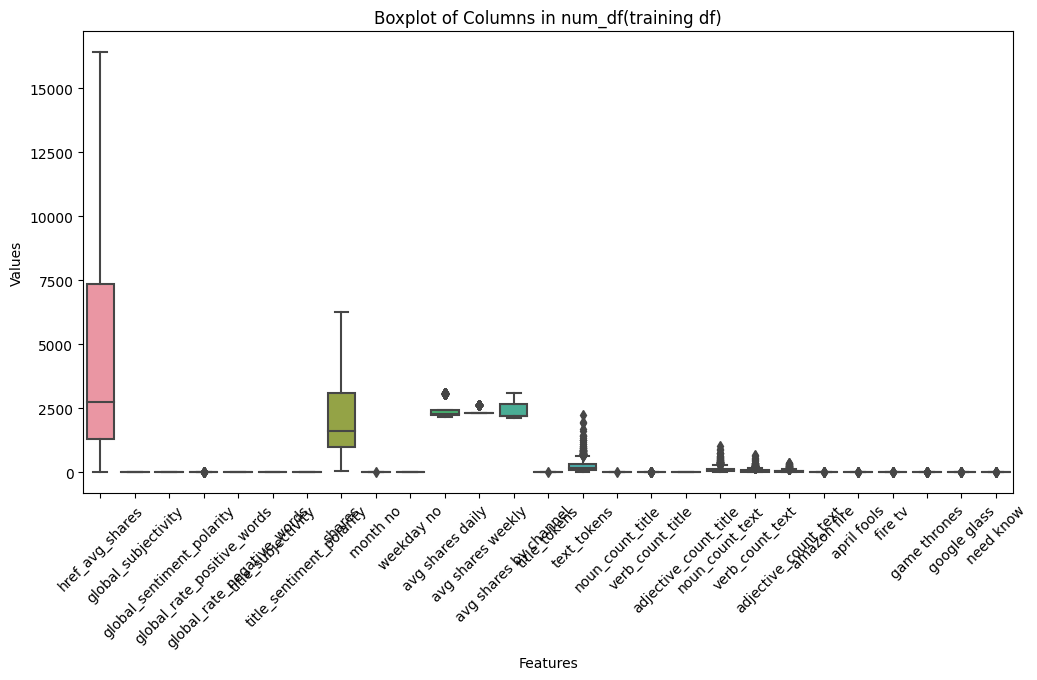

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = num_df.iloc[:,15:42])

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in num_df(training df)')
plt.show()

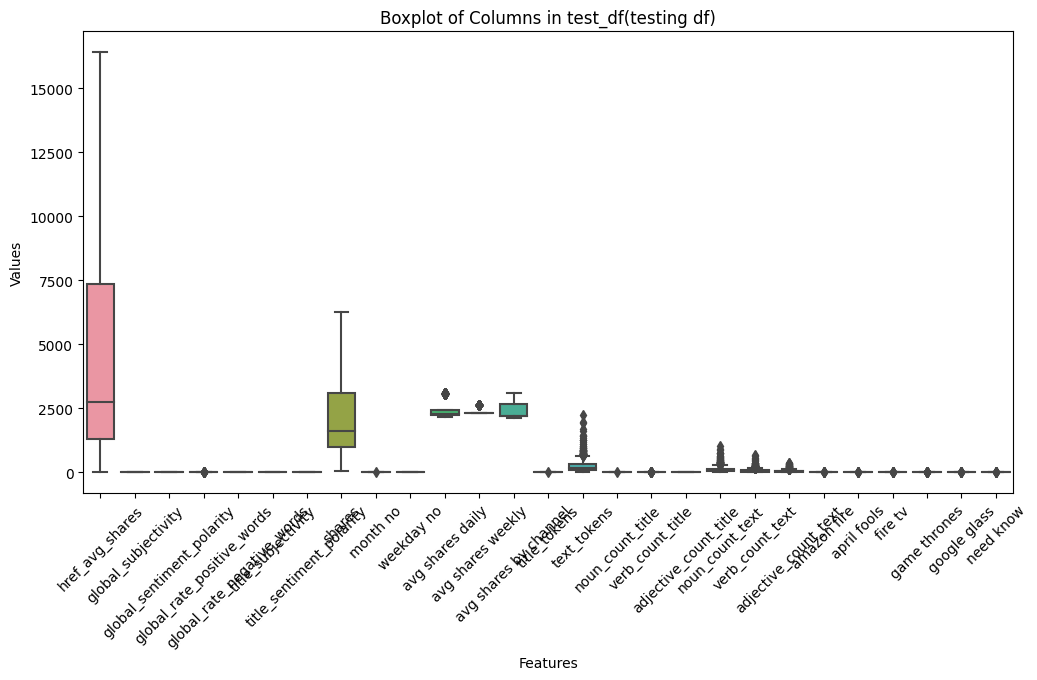

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = test_df.iloc[:,15:42])

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df(testing df)')
plt.show()

In [11]:
print("\nDistribution (BEFORE outlier treatment):")
cols_to_treat.describe()


Distribution (BEFORE outlier treatment):


,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.532183,10.158158,4.260260,0.547548,4.675496,7.207207,1132.205907,5499.373117,3256.800153,4976.071248,0.450364,0.106496,0.037962,0.017433,0.293408,0.056851,2366.762763,2366.762763,2366.762763,2366.762763,6.740741,254.267267,3.743744,1.349349,1.146146,117.890891,69.647648,49.148148,0.007007,0.007007,0.010010,0.023023,0.010010,0.008008,0.007007,0.378378,0.180180,0.124124,3.885886,0.214214,0.150150,0.154154,60.316406,-202.034094
std,0.099346,7.654816,5.105337,0.807028,0.284113,1.859846,1181.656104,2231.951378,1047.739362,5258.348719,0.091591,0.087908,0.014989,0.009358,0.325482,0.170974,1812.447026,264.987744,116.628962,261.216199,1.612157,241.106151,1.330390,0.961731,0.929727,112.130833,69.618758,46.443774,0.083456,0.083456,0.099598,0.150052,0.099598,0.089173,0.083456,1.718394,0.838435,2.072486,6.577958,0.677552,0.365712,0.754585,26.597296,246.383643
min,0.272165,0.000000,0.000000,0.000000,3.942951,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.224646,-0.114407,0.001300,0.000000,0.000000,-0.225000,58.000000,2157.572687,2316.046429,2139.983784,2.000000,14.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.020000,-2213.300000
25%,0.466835,4.000000,1.000000,0.000000,4.490862,6.000000,0.000000,3613.040000,2534.726000,1300.000000,0.395563,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000,2233.879630,2316.046429,2208.388571,6.000000,106.500000,3.000000,1.000000,0.000000,49.000000,28.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46.440000,-272.620000
50%,0.533149,8.000000,2.000000,0.000000,4.685668,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102511,0.037325,0.016340,0.200000,0.000000,1600.000000,2284.658768,2316.046429,2208.388571,7.000000,176.000000,4.000000,1.000000,1.000000,82.000000,48.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,62.340000,-124.770000
75%,0.596615,14.000000,7.000000,1.000000,4.856136,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.162790,0.046892,0.022606,0.500000,0.150000,3100.000000,2441.637795,2316.046429,2676.025510,8.000000,320.500000,5.000000,2.000000,2.000000,146.000000,86.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,80.280000,-50.845000
max,0.791285,29.000000,16.000000,2.500000,5.404047,10.000000,3613.040000,10985.215000,5720.423500,16402.500000,0.680424,0.329107,0.074246,0.039680,1.000000,0.375000,6250.000000,3088.297872,2634.698113,3106.109091,11.000000,2226.000000,9.000000,5.00

In [20]:
targetcol = ['shares']